In [1]:
# load dataset (student Portuguese scores)
import pandas as pd
d = pd.read_csv('dataset/student-por.csv', sep=';')
len(d)

649

In [2]:
# generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [3]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [4]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [5]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

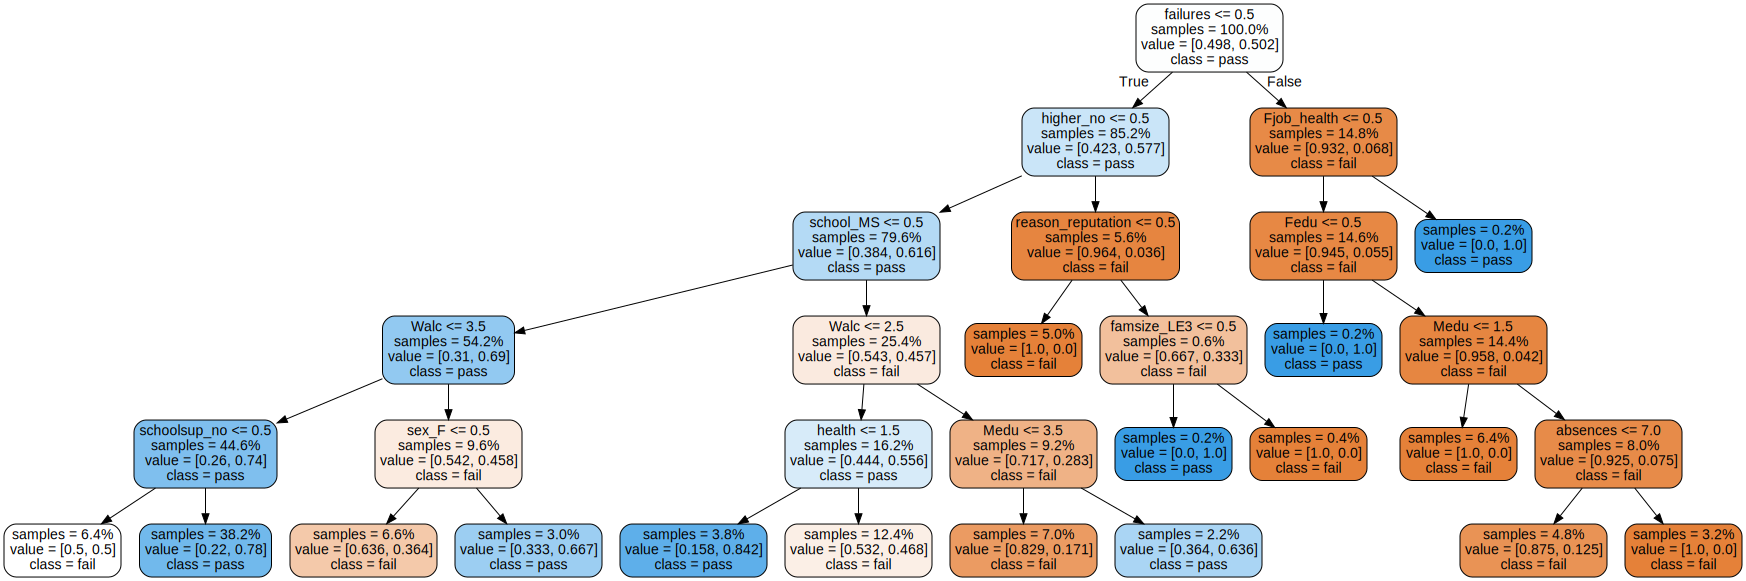

In [7]:
# visualize tree
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=list(d_train_att), class_names=["fail", "pass"], 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [8]:
# save tree
tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"], 
                     filled=True, rounded=True)

In [9]:
t.score(d_test_att, d_test_pass)

0.7114093959731543

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.08)


In [11]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.62 (+/- 0.05)
Max depth: 2, Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Accuracy: 0.69 (+/- 0.04)
Max depth: 4, Accuracy: 0.69 (+/- 0.06)
Max depth: 5, Accuracy: 0.66 (+/- 0.08)
Max depth: 6, Accuracy: 0.68 (+/- 0.08)
Max depth: 7, Accuracy: 0.67 (+/- 0.07)
Max depth: 8, Accuracy: 0.67 (+/- 0.06)
Max depth: 9, Accuracy: 0.67 (+/- 0.09)
Max depth: 10, Accuracy: 0.66 (+/- 0.07)
Max depth: 11, Accuracy: 0.67 (+/- 0.06)
Max depth: 12, Accuracy: 0.65 (+/- 0.06)
Max depth: 13, Accuracy: 0.66 (+/- 0.07)
Max depth: 14, Accuracy: 0.65 (+/- 0.07)
Max depth: 15, Accuracy: 0.65 (+/- 0.05)
Max depth: 16, Accuracy: 0.66 (+/- 0.02)
Max depth: 17, Accuracy: 0.64 (+/- 0.07)
Max depth: 18, Accuracy: 0.64 (+/- 0.04)
Max depth: 19, Accuracy: 0.65 (+/- 0.06)


In [12]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
    
depth_acc

array([[ 1.        ,  0.61950138,  0.05315849],
       [ 2.        ,  0.68712523,  0.05971779],
       [ 3.        ,  0.68880589,  0.03784288],
       [ 4.        ,  0.69032123,  0.0671287 ],
       [ 5.        ,  0.66732597,  0.08104809],
       [ 6.        ,  0.67651031,  0.07653079],
       [ 7.        ,  0.67349229,  0.07592586],
       [ 8.        ,  0.67810713,  0.0787498 ],
       [ 9.        ,  0.67519589,  0.11495351],
       [10.        ,  0.66423676,  0.05644097],
       [11.        ,  0.67345651,  0.06938863],
       [12.        ,  0.65502947,  0.06471668],
       [13.        ,  0.65808273,  0.05696579],
       [14.        ,  0.64267408,  0.06390417],
       [15.        ,  0.6518931 ,  0.05830329],
       [16.        ,  0.65950266,  0.03959324],
       [17.        ,  0.64728928,  0.0723307 ],
       [18.        ,  0.65177439,  0.02947685],
       [19.        ,  0.63494545,  0.06645904]])

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

<Figure size 640x480 with 1 Axes>